In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dob_and_minutes.csv")
df

,name,year,minutes,dob
0,Abby Elinsky,2020 Fall Series,291.0,1996-01-08
1,Abby Elinsky,2019,548.0,1996-01-08
2,Abby Elinsky,2018,32.0,1996-01-08
3,Alex Chidiac,2022,960.0,1999-01-15
4,Andressinha,2019,438.0,1995-05-01
...,...,...,...,...
2190,Zoey Goralski,2020 Challenge Cup,253.0,1995-01-22
2191,Zoey Goralski,2019,59.0,1995-01-22
2192,Évelyne Viens,2021,321.0,1997-02-06
2193,Évelyne Viens,2021 Challenge Cup,39.0,1997-02-06


In [3]:
df["dob"] = pd.to_datetime(df["dob"])
df["dob_day"] = df["dob"].dt.day
df["dob_month"] = df["dob"].dt.month
df["dob_year"] = df["dob"].dt.year
df

,name,year,minutes,dob,dob_day,dob_month,dob_year
0,Abby Elinsky,2020 Fall Series,291.0,1996-01-08,8,1,1996
1,Abby Elinsky,2019,548.0,1996-01-08,8,1,1996
2,Abby Elinsky,2018,32.0,1996-01-08,8,1,1996
3,Alex Chidiac,2022,960.0,1999-01-15,15,1,1999
4,Andressinha,2019,438.0,1995-05-01,1,5,1995
...,...,...,...,...,...,...,...
2190,Zoey Goralski,2020 Challenge Cup,253.0,1995-01-22,22,1,1995
2191,Zoey Goralski,2019,59.0,1995-01-22,22,1,1995
2192,Évelyne Viens,2021,321.0,1997-02-06,6,2,1997
2193,Évelyne Viens,2021 Challenge Cup,39.0,1997-02-06,6,2,1997


In [4]:
def plot_data(bucket, metric, year=None):
    df_year = df if year == None else df[df["year"] == year]
    df_group = (
        df_year.groupby("dob_" + bucket)
        .agg(count=("name", "count"), minutes=("minutes", "sum"))
        .reset_index()
    )
    df_group[metric] = df_group[metric] / df_group[metric].sum()
    
    plt.bar(df_group["dob_" + bucket], df_group[metric])
    
    if bucket == "year":
        plt.xlim(df["dob_year"].min(), df["dob_year"].max())
        
    plt.ylim(0, 0.2)

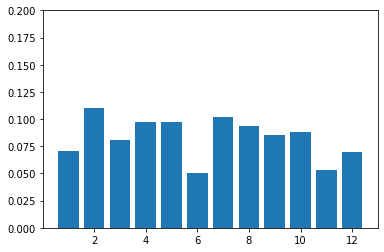

In [5]:
plot_data("month", "count")

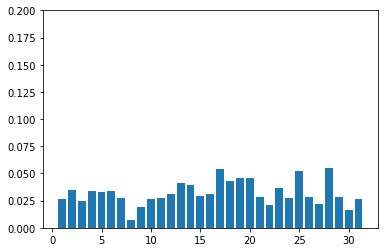

In [6]:
plot_data("day", "count")

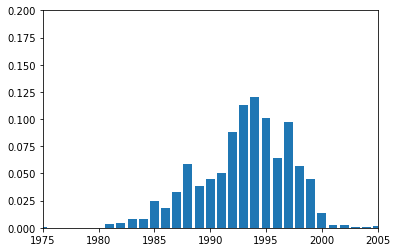

In [7]:
plot_data("year", "count")

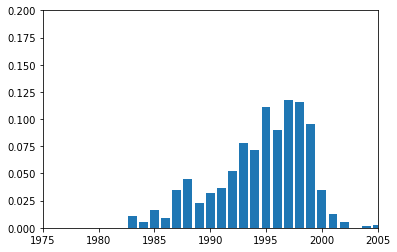

In [8]:
plot_data("year", "minutes", "2022")

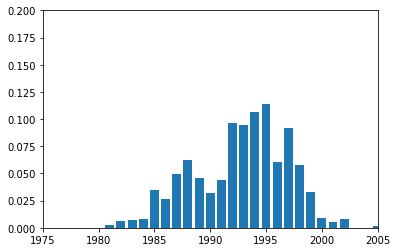

In [9]:
plot_data("year", "minutes", "2021")

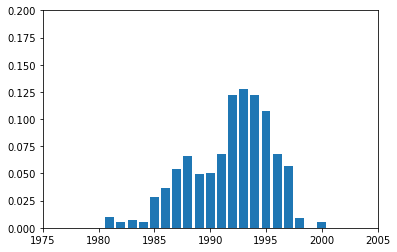

In [10]:
plot_data("year", "minutes", "2019")

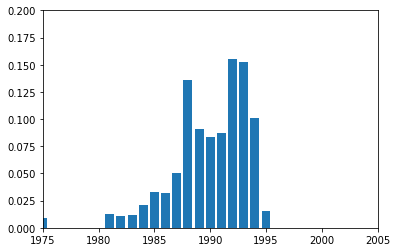

In [11]:
plot_data("year", "minutes", "2016")

In [16]:
df.loc[(df["year"] == "2016") & (df["dob_year"] == 1988)]

,name,year,minutes,dob,dob_day,dob_month,dob_year
187,Alyssa Naeher,2016,1290.0,1988-04-20,20,4,1988
241,Angela Salem,2016,1700.0,1988-07-24,24,7,1988
322,Becky Edwards,2016,806.0,1988-05-22,22,5,1988
349,Beverly Yanez,2016,1543.0,1988-07-19,19,7,1988
384,Brittany Taylor,2016,1800.0,1988-09-18,18,9,1988
522,Christen Press,2016,1380.0,1988-12-29,29,12,1988
718,Ellie Brush,2016,1336.0,1988-08-19,19,8,1988
810,Estelle Johnson,2016,990.0,1988-07-21,21,7,1988
825,Ga-Eul Jeon,2016,86.0,1988-09-14,14,9,1988
949,Janice Cayman,2016,96.0,1988-10-12,12,10,1988


In [17]:
df.loc[(df["year"] == "2016") & (df["dob_year"] == 1989)]

,name,year,minutes,dob,dob_day,dob_month,dob_year
64,Abby Erceg,2016,1714.0,1989-11-20,20,11,1989
115,Alex Morgan,2016,1350.0,1989-07-02,2,7,1989
165,Allysha Chapman,2016,711.0,1989-01-25,25,1,1989
177,Alyssa Mautz,2016,1037.0,1989-07-29,29,7,1989
189,Amanda DaCosta,2016,707.0,1989-10-07,7,10,1989
197,Amandine Henry,2016,758.0,1989-09-28,28,9,1989
602,Danielle Schulmann,2016,42.0,1989-12-22,22,12,1989
717,Elli Reed,2016,1284.0,1989-08-10,10,8,1989
1066,Julie King,2016,1524.0,1989-10-21,21,10,1989
1131,Kathryn Williamson,2016,198.0,1989-08-01,1,8,1989
